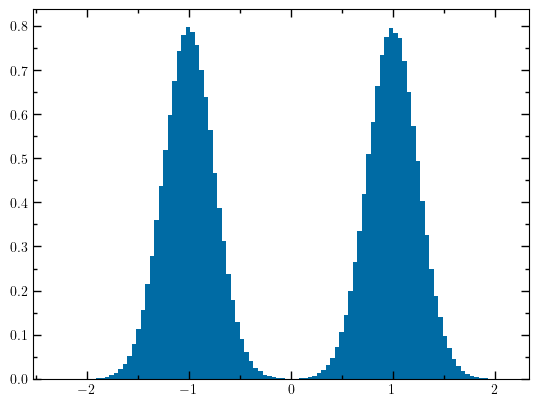

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import AutoMinorLocator

plt.rcParams.update({
	"text.usetex": True,
	"font.family": "serif",
	"font.serif": ["Times New Roman"], # or any other serif font you prefer
	"font.size": 14, # Set the default font size
	'xtick.direction': 'in',
	'ytick.direction': 'in',
	'xtick.top': True,
	'ytick.right': True,
	'xtick.major.size': 6,
	'ytick.major.size': 6,
	'xtick.major.width': 1,
	'ytick.major.width': 1,
	'xtick.minor.visible': True,
	'ytick.minor.visible': True,
	'xtick.minor.size': 3,
	'ytick.minor.size': 3,
	'xtick.minor.width': 1,
	'ytick.minor.width': 1,
	'xtick.labelsize': 10,
	'ytick.labelsize': 10
	})
plt.style.use('tableau-colorblind10')
# plt.style.use('seaborn-v0_8-colorblind')

plt.minorticks_on()
# Set the minor tick frequency globally
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))

samples = np.loadtxt("data/double_peak_samples_1M.dat")
plt.hist(samples,bins=100,density=True)
plt.show()

In [2]:
labels = ['100K', '1M', '10M']
mu = 1.0; sigma = 0.25
cumulant_filenames = ['data/double_peak_cumulants_' + n + '.dat' for n in labels]
moment_filenames = ['data/double_peak_moments_' + n + '.dat' for n in labels]

exact_m = [
	sigma**2 + mu**2,
	3 * sigma**4 + 6 * sigma**2 * mu**2 + mu**4, 
	15 * sigma**6 + 45 * sigma**4 * mu**2 + 15*sigma**2 * mu**4 + mu**6,
	105 * sigma**8 + 420 * sigma**6 * mu**2 + 210 * sigma **4 * mu**4 + 28 * sigma**2 * mu**6 + mu**8
	]

exact_c = np.array([1, sigma**2 + mu**2, 1, -2*mu**4, 1, 16 * mu**6, 1, -272 * mu**8])

In [3]:
cumulants = []
moments = []

for mfile, cfile in zip(moment_filenames, cumulant_filenames):
    kappa = np.loadtxt(cfile, delimiter=',')
    cumulants.append(kappa.T)
    mom = np.loadtxt(mfile, delimiter=',')
    moments.append(mom.T)

cumulants = np.stack(cumulants, axis=0)
moments = np.stack(moments, axis=0)


In [4]:
fw_cumulants = np.loadtxt("data/double_peak_cumulants_1M_wdrift.dat", delimiter=",").T
fw_moments = np.loadtxt("data/double_peak_moments_1M_wdrift.dat", delimiter=",").T

In [5]:
jack_cumulants = np.loadtxt("data/jack_cumulants_1M.dat", delimiter=",").T
jack_cerr = np.loadtxt("data/jack_cumulantserr_1M.dat", delimiter=",").T

jack_moments = np.loadtxt("data/jack_moments_1M.dat", delimiter=",").T
jack_merr = np.loadtxt("data/jack_momentserr_1M.dat", delimiter=",").T

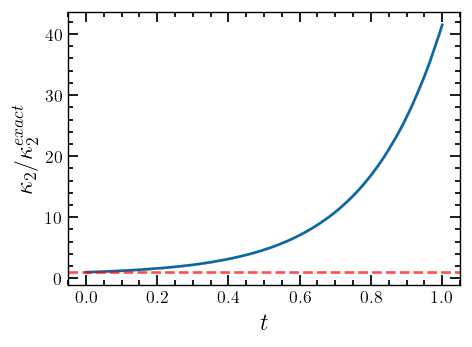

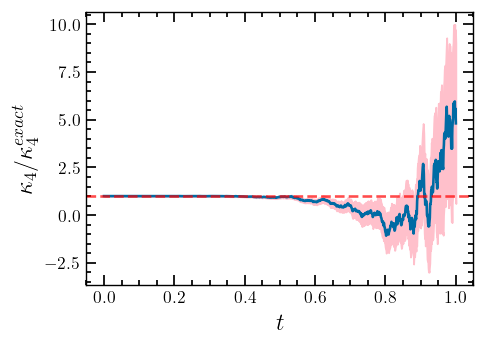

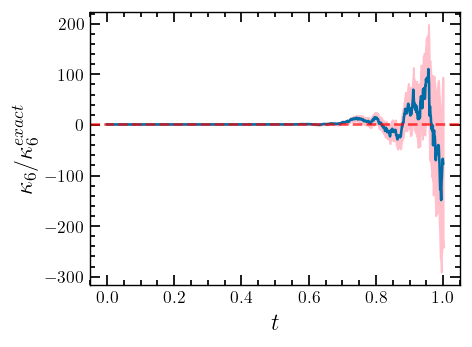

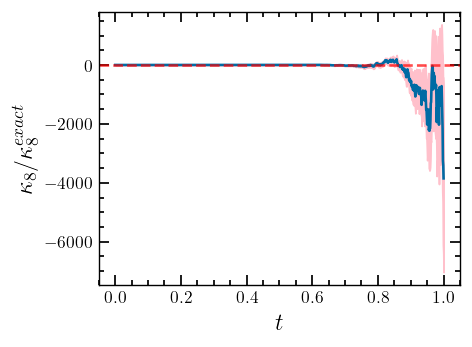

In [6]:
max_order = jack_cumulants.shape[0]
dtime = np.linspace(0, 1., jack_cumulants.shape[1])

low = (jack_cumulants - jack_cerr) / exact_c[:max_order, None]
high = (jack_cumulants + jack_cerr) / exact_c[:max_order, None]
c = jack_cumulants/exact_c[:max_order, None]


for i in range(max_order//2):
	fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
	ax_.plot(dtime, c[2*i + 1])
	ax_.fill_between(dtime, low[2*i + 1], high[2*i + 1], color='pink')
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\kappa_{(i+1) * 2}/\\kappa_{(i+1) * 2}^{{exact}}$')
	ax_.set_xlabel("$t$")

	plt.tight_layout()

In [29]:
print(5*"#", " Data at τ=0", 5*"#")
for (c,e) in zip(jack_cumulants[1::2, 0], jack_cerr[1::2, 0]):
	print(f"{c:.5f} ± {e:.7f}")

print(5*"#", " Data at t = 1", 5*"#")
for (c,e) in zip(jack_cumulants[1::2, 0], jack_cerr[1::2, 0]):
	print(f"{c:.5f} ± {e:.7f}")

#####  Data  #####
1.06201 ± 0.0005538
-1.99816 ± 0.0021810
15.97746 ± 0.0261666
-271.48975 ± 0.5927829


type	| $\kappa_2$    | $\kappa_4$    | $\kappa_6$    | $\kappa_8$    | \
		| ------------- | ------------- | ------------- | ------------- | \
		| 1.0609(5) 	| -1.976(2) 	| 15.717(24) 	| -265.59(55) 	| \
		| 1.0624(5) 	| -1.999(2)		| 15.998(23) 	| -271.96(53) 	|

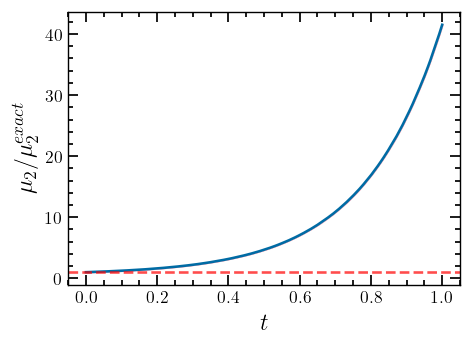

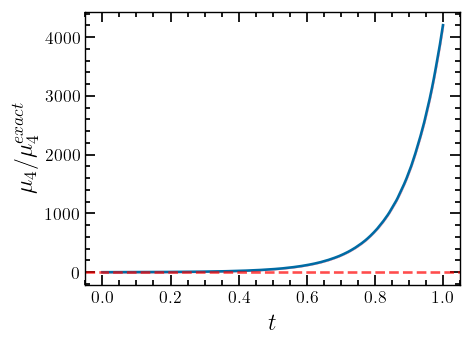

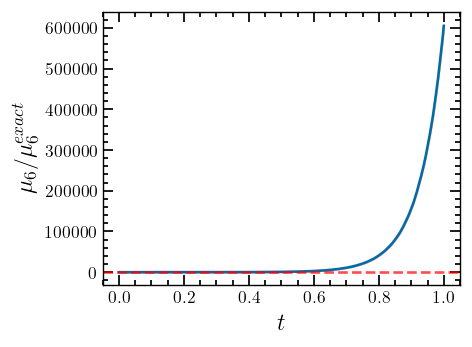

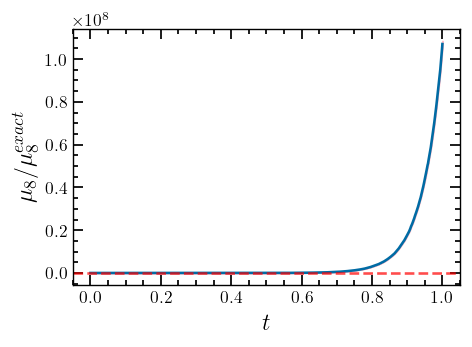

In [7]:
max_order = jack_moments.shape[0]
dtime = np.linspace(0, 1., jack_moments.shape[1])

low = (jack_moments - jack_merr)
high = (jack_moments + jack_merr)
c = jack_moments


for i in range(max_order//2):
	fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
	ax_.plot(dtime, c[2*i + 1]/exact_m[i])
	ax_.fill_between(dtime, low[2*i + 1]/exact_m[i], high[2*i + 1]/exact_m[i], color='pink')
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\mu_{(i+1) * 2}/\\mu_{(i+1) * 2}^{{exact}}$')
	ax_.set_xlabel("$t$")

	plt.tight_layout()

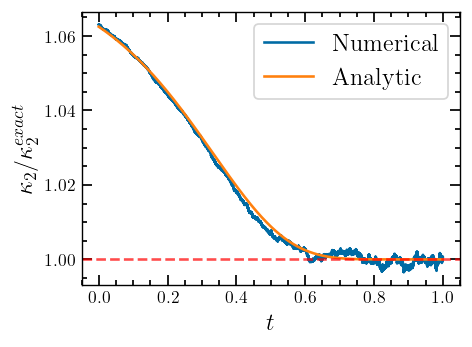

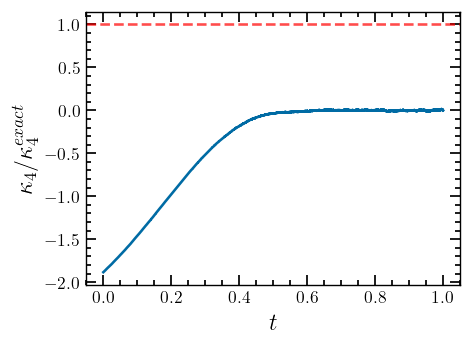

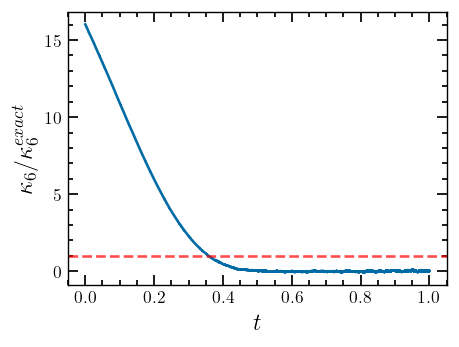

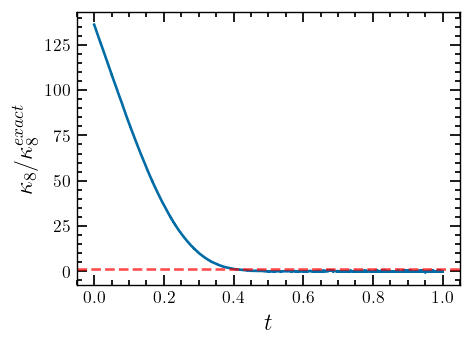

In [12]:
# fw_cumulants = cumulants[1]
max_order = fw_cumulants.shape[0]
# fig.suptitle("Cumulant evolution in backward process")

dtime = np.linspace(0, 1., fw_cumulants.shape[-1])
u_t = (10**(2*dtime) - 1)/2/np.log(10)
foo = (mu*mu + sigma * sigma - 1) * np.exp(-u_t) + 1

for i in range(max_order//2):
	fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
	c = fw_cumulants[2*i + 1]/exact_c[i]
	ax_.plot(dtime, c, label='Numerical')
	hline = 1.
	if i==0:
		ax_.plot(dtime, foo/exact_c[0], label="Analytic")
		ax_.legend()
		hline = 1./exact_c[0]
	ax_.axhline(hline, ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\kappa_{(i+1) * 2}/\\kappa_{(i+1) * 2}^{{exact}}$')
	ax_.set_xlabel("$t$")

	plt.tight_layout()
	plt.savefig(f'figures/cumulant{2 * (i + 1)}_fw_wdrift.pdf')

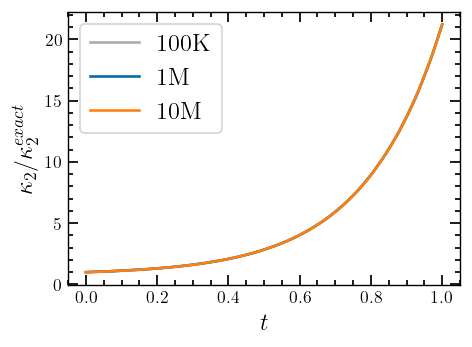

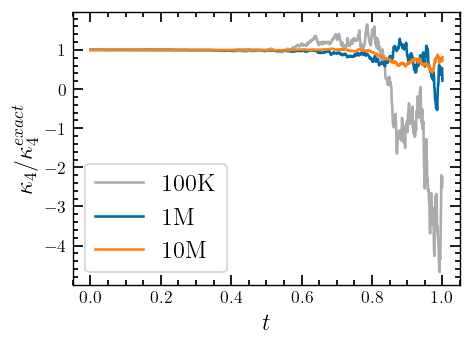

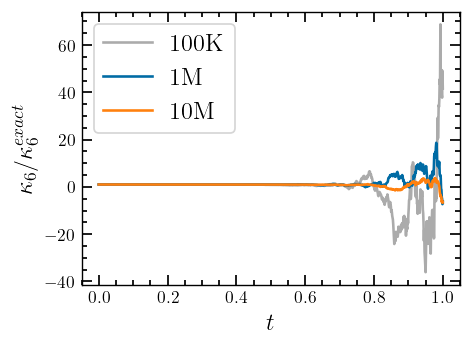

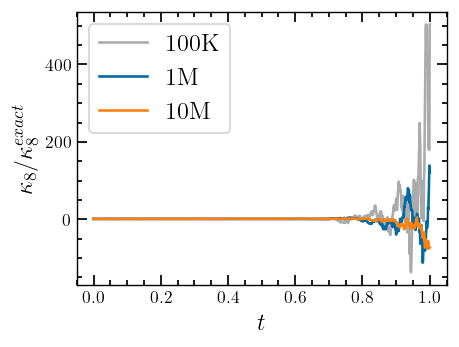

In [13]:
t= np.linspace(0, 1., 1001)

colors = ["#ababab", "#006ba4", "#ff800e"]

for j in range(4):
	fig, ax = plt.subplots(1, 1, dpi=125, figsize=(4,3))
	for i, stat in enumerate(cumulants):
		s = stat[2*j+1]/exact_c[2*j + 1]
		ax.plot(t, s[::10], label=labels[i], color=colors[i])
		ax.set_ylabel(f'$\\kappa_{(j+1) * 2}/\\kappa_{(j+1) * 2}^{{exact}}$')
		ax.set_xlabel("$t$")

	plt.legend()
	plt.tight_layout()
	plt.savefig(f'figures/cumulant{2 * (j + 1)}_fw_by_size.pdf')

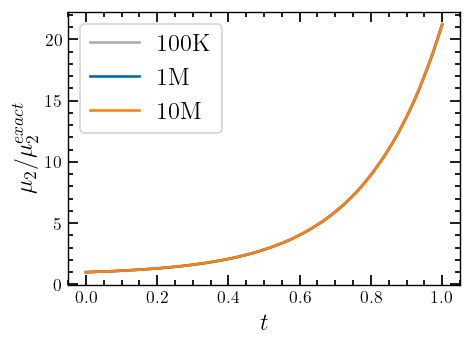

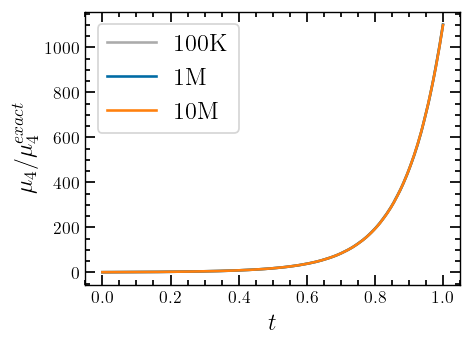

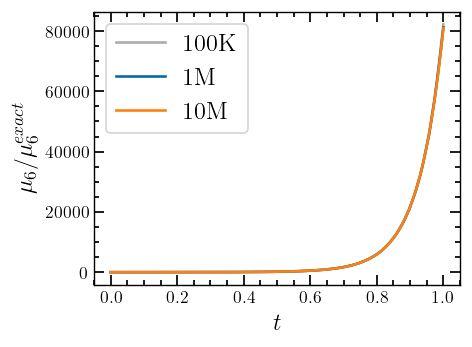

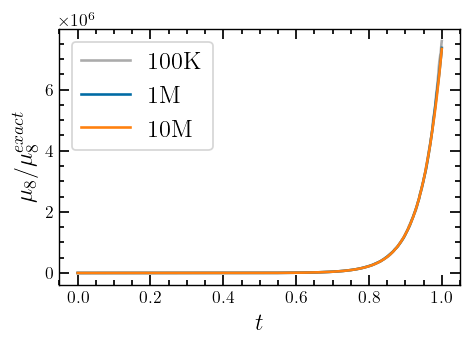

In [14]:
t= np.linspace(0, 1., 1001)

colors = ["#ababab", "#006ba4", "#ff800e"]
for j in range(4):
	fig, ax = plt.subplots(1, 1, dpi=125, figsize=(4,3))
	for i, stat in enumerate(moments):
		s = stat[2*j+1]/exact_m[j]
		ax.plot(t, s[::10], label=labels[i], color=colors[i])
		ax.set_ylabel(f'$\\mu_{(j+1) * 2}/\\mu_{(j+1) * 2}^{{exact}}$')
		ax.set_xlabel("$t$")

	plt.legend()
	plt.tight_layout()
	plt.savefig(f'figures/moment{2 * (j + 1)}_fw_by_size.pdf')

In [15]:
bwcumulants = np.loadtxt("data/bw_double_peak_cumulants_1M_wdrift.dat", delimiter=",").T
bwmoments = np.loadtxt("data/bw_double_peak_moments_1M_wdrift.dat", delimiter=",").T

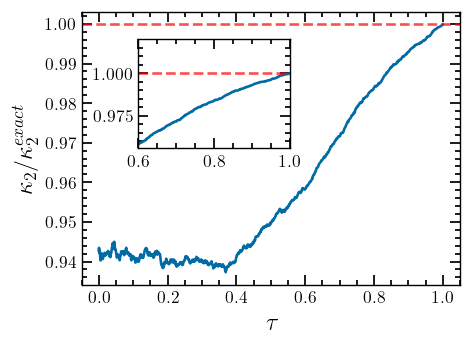

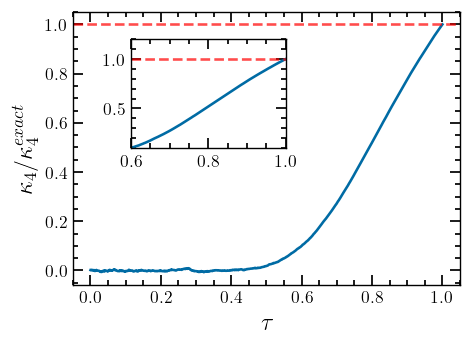

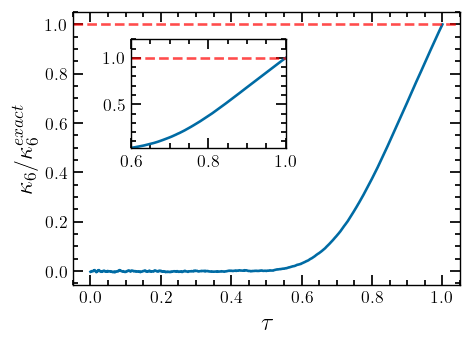

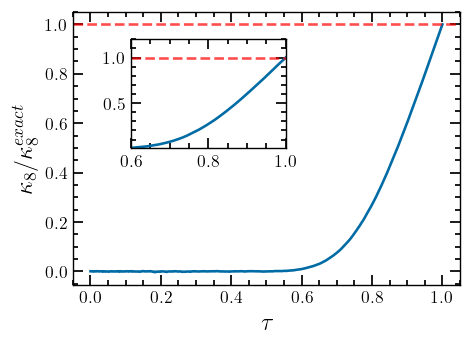

In [18]:
max_order = bwcumulants.shape[0]
# fig.suptitle("Cumulant evolution in backward process")

dtime = np.linspace(0, 1., bwcumulants.shape[1])

y0 = [0.5, 0.5, 0.5, 0.5]
x0 = [0.15, 0.15, 0.15, 0.15]
offsetx = [-0.0025, -0.005, -.005, -.005]
offsety = [0.02, 0.2, .2, .2]
for i in range(max_order//2):
	fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
	c = bwcumulants[2*i + 1]/exact_c[2*i+1]
	ax_.plot(dtime, c)
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\kappa_{(i+1) * 2}/\\kappa_{(i+1) * 2}^{{exact}}$')
	ax_.set_xlabel("$\\tau$")

	subset_mask = (dtime > 0.6) & (dtime <= 1.)
	# Adding the inset
	inset_ax = ax_.inset_axes([x0[i], y0[i], 0.4, 0.4])  # [x0, y0, width, height] in relative coordinates
	inset_ax.plot(dtime[subset_mask], c[subset_mask])
	inset_ax.axhline(1., ls='--', alpha=0.7, c='red')
	inset_ax.set_xlim(0.6, 1.0)
	inset_ax.set_ylim(min(c[subset_mask]) + offsetx[i], max(c[subset_mask]) + offsety[i])

	plt.tight_layout()
	plt.savefig(f'figures/cumulant{2 * (i + 1)}_bw_wdrift.pdf')

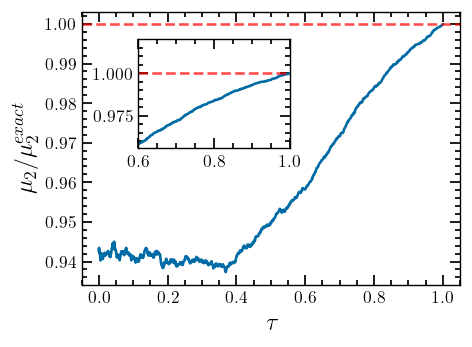

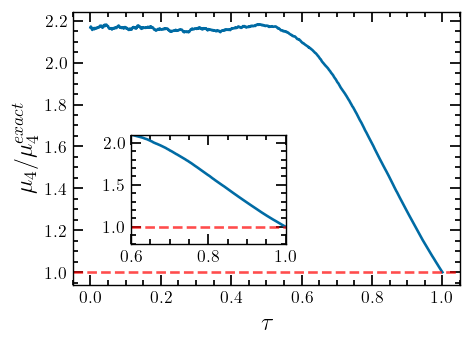

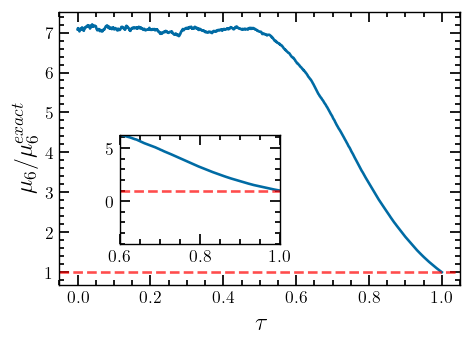

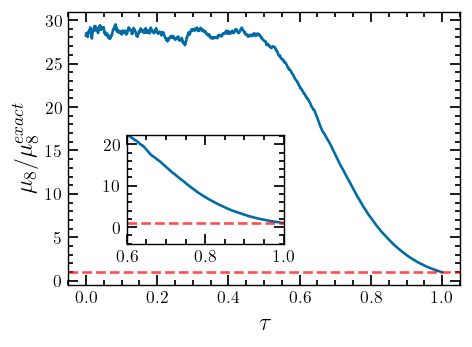

In [32]:
max_order = bwmoments.shape[0]
# fig.suptitle("Cumulant evolution in backward process")

dtime = np.linspace(0, 1., bwmoments.shape[1])

y0 = [0.5, 0.15, 0.15, 0.15]
x0 = [0.15, 0.15, 0.15, 0.15]
offsetx = [-0.0025, -0.2, -5, -5]
offsety = [0.02, 0., 0, 0]
for i in range(max_order//2):
	fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
	c = bwmoments[2*i + 1]/exact_m[i]
	ax_.plot(dtime, c)
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\mu_{(i+1) * 2}/\\mu_{(i+1) * 2}^{{exact}}$')
	ax_.set_xlabel("$\\tau$")

	subset_mask = (dtime > 0.6) & (dtime <= 1.)
	# Adding the inset
	inset_ax = ax_.inset_axes([x0[i], y0[i], 0.4, 0.4])  # [x0, y0, width, height] in relative coordinates
	inset_ax.plot(dtime[subset_mask], c[subset_mask])
	inset_ax.axhline(1., ls='--', alpha=0.7, c='red')
	inset_ax.set_xlim(0.6, 1.0)
	inset_ax.set_ylim(min(c[subset_mask]) + offsetx[i], max(c[subset_mask]) + offsety[i])

	plt.tight_layout()
	plt.savefig(f'figures/moment{2 * (i + 1)}_bw_wdrift.pdf')

In [16]:
O_fw = []; O_bw = []
for i in range(3):
	O_fw.append(np.load(f'DM_cumulants_Plot/data/O{2*(i+1)}_forward.npy'))
	O_bw.append(np.load(f'DM_cumulants_Plot/data/O{2*(i+1)}.npy'))
O_fw = np.stack(O_fw)
O_bw = np.stack(O_bw)

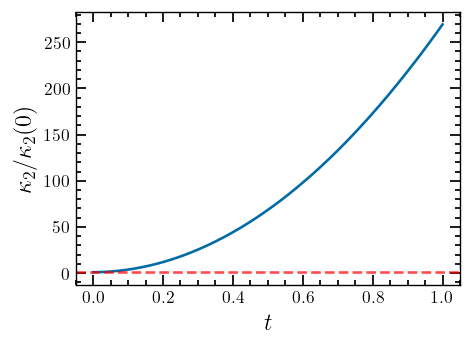

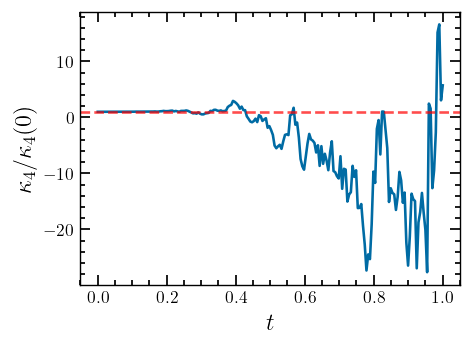

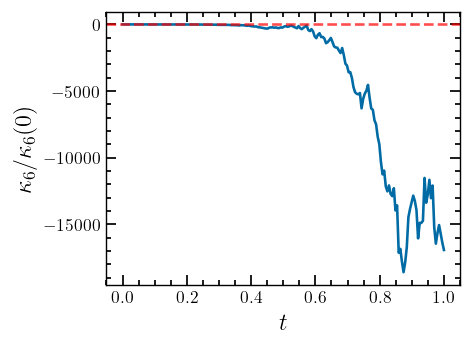

In [30]:
max_order = 2 * O_fw.shape[0]
# fig.suptitle("Cumulant evolution in backward process")

dtime = np.linspace(0, 1., O_fw.shape[1])
# exact_c = np.array([1, sigma**2 + mu**2, 1, -2*mu**4, 1, 16 * mu**6, 1, -272 * mu**8])[:max_order]

x0 = [0.15, 0.1, 0.3, 0.1]
y0 = [0.5, 0.1, 0.1, 0.1]
offset = [-0.1, -0.5, 5]
for i in range(max_order//2):
	fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
	c = O_fw[i]
	c /= c[0]
	ax_.plot(dtime, c)
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\kappa_{(i+1) * 2}/\\kappa_{(i+1) * 2}(0)$')
	ax_.set_xlabel("$t$")

	# subset_mask = (dtime > 0.6) & (dtime <= 1.)
	# inset_ax = ax_.inset_axes([x0[i], y0[i], 0.4, 0.4])  # [x0, y0, width, height] in relative coordinates
	# inset_ax.plot(dtime[subset_mask], c[subset_mask])
	# inset_ax.axhline(1., ls='--', alpha=0.7, c='red')
	# inset_ax.set_xlim(0.6, 1.0)
	# inset_ax.set_ylim(min(c[subset_mask]) + offset[i], max(c[subset_mask]))

	plt.tight_layout()
	plt.savefig(f'figures/O{2 * (i + 1)}_fw.pdf')

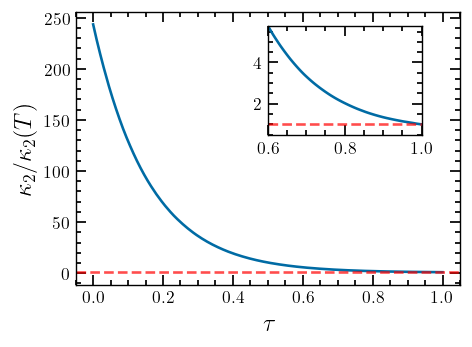

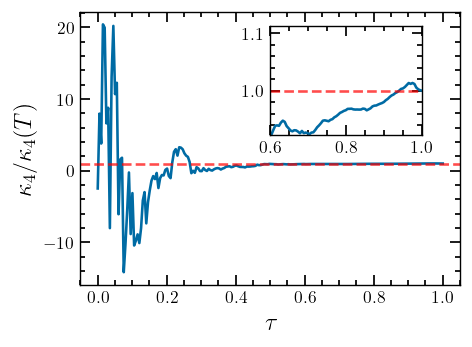

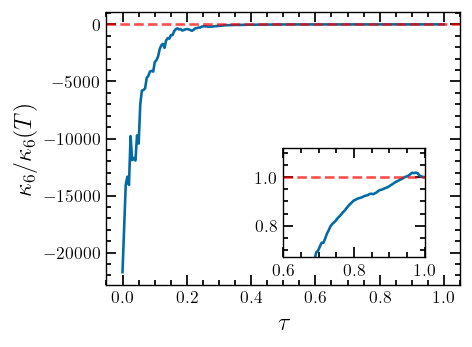

In [17]:
max_order = 2 * O_bw.shape[0]
# fig.suptitle("Cumulant evolution in backward process")

dtime = np.linspace(0, 1., O_bw.shape[1])
# exact_c = np.array([1, sigma**2 + mu**2, 1, -2*mu**4, 1, 16 * mu**6, 1, -272 * mu**8])[:max_order]

x0 = [0.5, 0.5, 0.5]
y0 = [0.55, 0.55, 0.1]
offset = [-0.5, 0., .5]
for i in range(max_order//2):
	fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
	c = O_bw[i]
	c /= c[-1]
	ax_.plot(dtime, c)
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\kappa_{(i+1) * 2}/\\kappa_{(i+1) * 2}(T)$')
	ax_.set_xlabel("$\\tau$")

	subset_mask = (dtime > 0.6) & (dtime <= 1.)
	inset_ax = ax_.inset_axes([x0[i], y0[i], 0.4, 0.4])  # [x0, y0, width, height] in relative coordinates
	inset_ax.plot(dtime[subset_mask], c[subset_mask])
	inset_ax.axhline(1., ls='--', alpha=0.7, c='red')
	inset_ax.set_xlim(0.6, 1.0)
	inset_ax.set_ylim(min(c[subset_mask]) + offset[i], max(c[subset_mask])+0.1)

	plt.tight_layout()
	plt.savefig(f'figures/O{2 * (i + 1)}_bw.pdf')

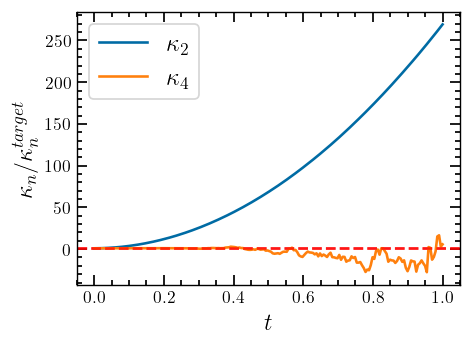

In [37]:
max_order = O_fw.shape[0]
dtime = np.linspace(0, 1., O_fw.shape[1])

fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
for i in range(max_order-1):
	c = O_fw[i]
	c /= c[0]
	ax_.plot(dtime, c, label=f"$\\kappa_{2 * (i+1)}$")
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\kappa_n/\\kappa_n^{{target}}$')
	ax_.set_xlabel("$t$")

plt.legend()
plt.tight_layout()
plt.savefig(f'figures/Oall_fw.pdf')

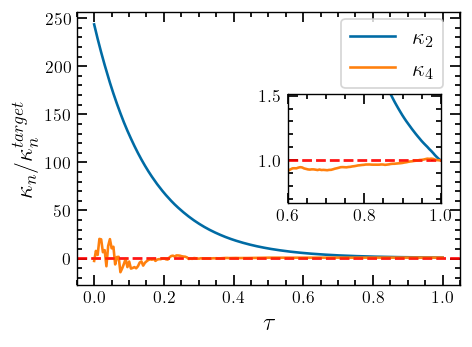

In [38]:
max_order = O_bw.shape[0]
dtime = np.linspace(0, 1., O_bw.shape[1])

fig, ax_ = plt.subplots(1, 1, dpi=125, figsize=(4, 3))
inset_ax = ax_.inset_axes([0.55, 0.3, 0.4, 0.4])  # [x0, y0, width, height] in relative coordinates
for i in range(max_order-1):
	c = O_bw[i]
	c /= c[-1]
	ax_.plot(dtime, c, label=f"$\\kappa_{2 * (i+1)}$")
	ax_.axhline(1., ls='--', alpha=0.7, c='red')
	ax_.set_ylabel(f'$\\kappa_n/\\kappa_n^{{target}}$')
	ax_.set_xlabel("$\\tau$")
	# ax_.set_yscale('symlog')


	subset_mask = (dtime > 0.6) & (dtime <= 1.)
	inset_ax.plot(dtime[subset_mask], c[subset_mask])
	inset_ax.axhline(1., ls='--', alpha=0.7, c='red')
	inset_ax.set_xlim(0.6, 1.0)
	inset_ax.set_ylim(min(c[subset_mask]) - 0.25, max(c[subset_mask])+0.5)
	# inset_ax.set_yscale('symlog')

plt.legend(fontsize=13, loc=(0.69, 0.72))
plt.tight_layout()
plt.savefig(f'figures/Oall_bw.pdf')

In [144]:
from scipy.special import binom
from scipy.stats import moment

def nth_cumulants(data, order, axis=0):
    """
    Calculate the first few cumulants of a dataset up to the specified order.

    Parameters:
    data (array-like): Input data
    order (int): The highest order of cumulants to calculate

    Returns:
    list: A list of cumulants from 1 to the specified order
    """
    cumulants_list = [np.mean(data, axis=axis)]  # First cumulant is the mean

    for n in range(2, order + 1):
        kappa = moment(data, n, axis=axis)
        if n > 2:
            for i in range(1, n):
                kappa -= (binom(n - 1, i - 1) * cumulants_list[i - 1] * 
                          moment(data, n-i, axis=axis))
        cumulants_list.append(kappa)

    return cumulants_list

def lattice_nth_cumulants(data, order):
    """
    Calculate the first few cumulants of a dataset up to the specified order.

    Parameters:
    data (array-like): Input data
    order (int): The highest order of cumulants to calculate

    Returns:
    list: A list of cumulants from 1 to the specified order
    """
    cumulants_list = [np.mean(data)]  # First cumulant is the mean

    for n in range(2, order + 1):
        kappa = np.mean(data**n, axis=(-2, -1)).mean()
        if n > 2:
            for i in range(1, n):
                kappa -= (binom(n - 1, i - 1) * cumulants_list[i - 1] * 
                          np.mean(data**(n-i), axis=(-2, -1)).mean())
        cumulants_list.append(kappa)

    return cumulants_list


def bootstrap_cumulants(data, order, axis=0, n_boot = 1000):
	n_samples = len(data)
	boot_cumulants = []

	for i in range(n_boot):
		boot_sample = np.random.choice(data, size=n_samples, replace=True)
		boot_cumulants.append(nth_cumulants(boot_sample, order, axis=axis))
	
	boot_cumulants = np.squeeze(boot_cumulants)
	cumulants_means = np.mean(boot_cumulants, axis=axis)
	
	boot_errors = np.std(boot_cumulants, axis=axis)

	return cumulants_means, boot_errors

def lattice_bootstrap_cumulants(data, order, axis=0, n_boot = 1000):
	n_samples = len(data)
	boot_cumulants = []

	for i in range(n_boot):
		boot_sample = np.random.choice(data.shape[0], size=n_samples, replace=True)
		boot_cumulants.append(lattice_nth_cumulants(data[boot_sample], order))
	
	boot_cumulants = np.squeeze(boot_cumulants)
	cumulants_means = np.mean(boot_cumulants, axis=axis)
	
	boot_errors = np.std(boot_cumulants, axis=axis)

	return cumulants_means, boot_errors

In [94]:
def norm(x):
	xmin = x.min(); xmax = x.max()
	return ((x - xmin) / (xmax - xmin) - 0.5) * 2

In [3]:
cfgs = np.load("DM_cumulants_Plot/data/cfgs_L32_k0.4_l0.022_10k.npy")
# cumulant_cfgs, errs_cfgs = lattice_bootstrap_cumulants(cfgs, 8, n_boot=100)

In [6]:
np.min(cfgs), np.max(cfgs)

(np.float64(-5.688858057329585), np.float64(5.733428439318093))

In [148]:
cumulant_cfgs, errs_cfgs

(array([-6.98097782e-04,  1.29151999e+01,  2.18414505e-02, -3.13293345e+02,
        -2.13948196e+00,  3.12573688e+04,  4.54553453e+02, -6.63884822e+06]),
 array([2.14954206e-02, 7.69567872e-03, 5.20158878e-01, 4.36716023e-01,
        5.18548542e+01, 6.63378878e+01, 1.10132845e+04, 1.89659001e+04]))

In [149]:
cfgs2 = norm(cfgs)
cumulant_cfgs2, errs_cfgs2  = lattice_bootstrap_cumulants(cfgs2, 8, n_boot=100)

In [150]:
cumulant_cfgs2, errs_cfgs2

(array([-4.51606271e-03,  3.96019491e-01,  4.80186433e-04, -2.94561965e-01,
        -1.46071065e-03,  9.01081419e-01,  9.50531587e-03, -5.86789289e+00]),
 array([0.004163  , 0.00027062, 0.00308782, 0.00046965, 0.00943914,
        0.00217842, 0.06147085, 0.01906542]))

In [151]:
cfgs3 = np.load("DM_cumulants_Plot/data/laststep_forward_samples_L32_k0.4_l0.022_nm1.npy")
cumulant_cfgs3, errs_cfgs3  = lattice_bootstrap_cumulants(cfgs2, 8, n_boot=100)

KeyboardInterrupt: 

In [124]:
cumulant_cfgs3, errs_cfgs3

(array([-0.00388573,  0.2087227 ,  0.00140008, -0.00567911, -0.00101902,
        -0.01431206,  0.00098768,  0.04103513]),
 array([0.00431839, 0.00151691, 0.00173078, 0.00132843, 0.00140203,
        0.0014414 , 0.00155371, 0.0013807 ]))

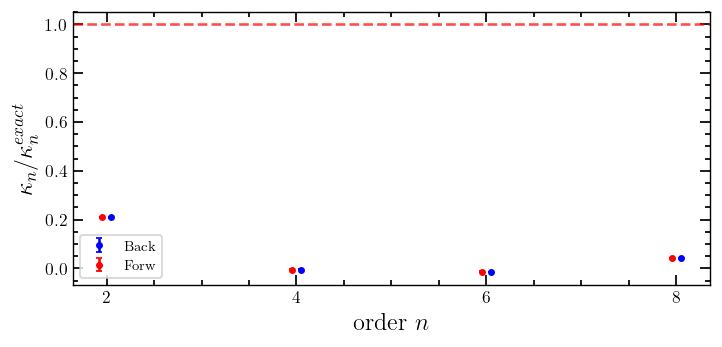

In [125]:
fig, ax = plt.subplots(1, 1, dpi=125, figsize=(6, 3))
order = np.arange(2, 8 + 1, 2)
ax.errorbar(order+0.05, cumulant_cfgs2[1::2], errs_cfgs2[1::2], capsize=2.0, marker='.', ls='', c='blue', label="Back")
ax.errorbar(order-0.05, cumulant_cfgs3[1::2], errs_cfgs3[1::2], capsize=2.0, marker='.', ls='', c='red',label='Forw')
# ax.axhline(1., ls='--', alpha=0.7, c='red')
ax.set_xticks(order)

ax.set_ylabel(f'$\\kappa_n/\\kappa_n^{{exact}}$')
ax.set_xlabel("order $n$")
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

In [140]:
for i in range(2, 8+1, 2):
	foo = np.mean(cfgs**i).mean()
	print(f"{foo:.5f}")

print(5 * "#")

for i in range(2, 8+1, 2):
	foo = np.mean(cfgs2**i).mean()
	print(f"{foo:.5f}")

print(5 * "#")

for i in range(2, 8+1, 2):
	foo = np.mean(cfgs3**i).mean()
	print(f"{foo:.5f}")


12.91589
187.10259
2880.57340
46556.94687
#####
0.39600
0.17591
0.08305
0.04117
#####
100.41024
30254.71476
15191101.92188
10672643385.85101


In [129]:
print(5*"#", " ?????", 5*"#")
for (c,e) in zip(cumulant_cfgs[1::2], errs_cfgs[1::2]):
	print(f"{c:.7f} ± {e:.7f}")

print(5*"#", " Backward", 5*"#")
for (c,e) in zip(cumulant_cfgs2[1::2], errs_cfgs2[1::2]):
	print(f"{c:.7f} ± {e:.7f}")

print(5*"#", " Forward", 5*"#")
for (c,e) in zip(cumulant_cfgs3[1::2], errs_cfgs3[1::2]):
	print(f"{c:.7f} ± {e:.7f}")

#####  ????? #####
6.8093001 ± 0.0429107
-6.1028910 ± 1.1692653
-494.7253338 ± 41.5365592
46418.0357427 ± 1344.9239741
#####  Backward #####
0.2087042 ± 0.0013511
-0.0056079 ± 0.0011603
-0.0144174 ± 0.0012571
0.0411890 ± 0.0012120
#####  Forward #####
0.2087227 ± 0.0015169
-0.0056791 ± 0.0013284
-0.0143121 ± 0.0014414
0.0410351 ± 0.0013807


\begin{table}[h!]
\centering
\begin{tabular}{c|c|c|c|c}
\hline\hline
            	& $\kappa_2$     & $\kappa_4$       & $\kappa_6$       & $\kappa_8$     \\ \hline\hline
HMC        		& $6.809(43)$   & $-6.10(1.17)$      & $-495(42)$     & $46418(1345)$   \\           
HMC (normed)    & $0.20870(135)$   & $-0.00561(116)$      & $-0.01442(126)$     & $0.0412(12)$    \\ 
Diffusion       & $0.20872(152)$   & $-0.00568(133)$      & $-0.01431(144)$     & $0.0410(14)$    \\ 
\hline\hline
\end{tabular}

In [61]:
(25**2 - 1) / np.log(25) / 2 / 0.37

np.float64(261.9682426791877)

****| data  | DDPM/VP | VE | 
κ2
κ4
κ6
κ8

In [33]:
foo = np.load("DM_cumulants_Plot/data/cfgs_L32_k0.4_l0.022_10k.npy")

In [34]:
foo

(10240, 32, 32)